<a href="https://colab.research.google.com/github/afprof/afprof/blob/main/chap02/Decision_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![표지](https://raw.githubusercontent.com/moseskim/ml-at-work/master/images/cover.jpg)

이 노트북은 한빛미디어에서 발생한 [<<머신러닝 실무 프로젝트 2판>>]()의 샘플 코드입니다. 코드 설명은 책 내용을 확인합니다. 또한, 이 코드를 실행한 결과에 대해 한빛미디어 및 옮긴이는 일체의 책임을 지지 않습니다.

# 2장 머신러닝으로 할 수 있는 일

이 노트북에서는 각 분류 알고리즘에서의 결정 경계를 시각화한다.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 각 알고리즘의 결정 경계

이 코드는 jgbos의 [노트북](http://nbviewer.jupyter.org/github/jgbos/iPython-Notebooks/blob/master/Comparing%20machine%20learning%20classifiers%20based%20on%20their%20hyperplanes%20or%20decision%20boundaries.ipynb)과 사이킷런의 [튜토리얼](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html?highlight=varying%20regularization%20multi%20layer%20perceptron)을 기반으로 작성했다.



In [4]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from numpy.random import normal as rnorm
from matplotlib.colors import ListedColormap

## 학습용 데이터 포인트를 플롯한다

다음 `plot_result`에서는 학습용 데이터 포인트와 분류기에 의한 결정 경계를 플롯한다.

In [5]:
plt.rcParams['font.size'] = 16

def plot_result(clf, clf_name, df, color = False):    
    X = df[['x','y']]
    Y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.4, random_state=40)
    n_classes = len(Y.unique())
    if color == True:
        cm = plt.cm.RdBu
        plot_colors = "rbym"
    else:
        cm = plt.cm.Greys
        plot_colors = "wkym"
    plot_markers = "o^v*"
    plot_step = 0.02
    
    x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
    y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
    
    clf.fit(X_train,y_train)    
    score = clf.score(X_test, y_test)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cm,  alpha=.5)

    # 학습용 데이터 포인트 플롯
    for i, color, m in zip(range(n_classes), plot_colors, plot_markers):
        if color == True:
            plt.scatter(X[Y==i].x, X[Y==i].y, c=color, label=i, cmap=cm, marker=m, s=80)
        else:
            plt.scatter(X[Y==i].x, X[Y==i].y, facecolor=color, edgecolor='k', label=i, cmap=cm, marker=m, s=80)

    plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')        
    plt.title(clf_name)

In [6]:
# 선형 분류 가능 예시
from numpy.random import seed

seed(100)

N = 50
p1 = pd.DataFrame(np.hstack((rnorm(loc=2.0, scale=0.5, size=(N,1)), 
                              rnorm(loc=2.0, scale=0.5, size=(N,1)))),
                   columns=['x','y'])
p1['label'] = 0
p2 = pd.DataFrame(np.hstack((rnorm(loc=1.0, scale=0.5, size=(N,1)), 
                              rnorm(loc=1.0, scale=0.5, size=(N,1)))),
                   columns=['x','y'])
p2['label'] = 1
df = pd.concat([p1, p2])

In [7]:
# XOR 패턴(선형 분리 불가능) 예시
N = 50
p1 = pd.DataFrame(np.hstack((rnorm(loc=1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p1['label'] = 0
p2 = pd.DataFrame(np.hstack((rnorm(loc=-1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p2['label'] = 1
p3 = pd.DataFrame(np.hstack((rnorm(loc=-1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=-1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p3['label'] = 0
p4 = pd.DataFrame(np.hstack((rnorm(loc=1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=-1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p4['label'] = 1
df_xor = pd.concat([p1,p2,p3,p4])

## 선형 퍼셉트론

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


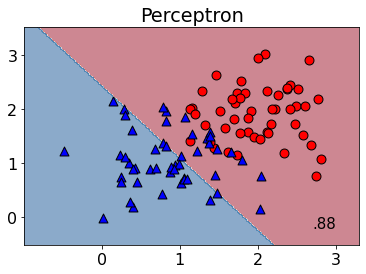

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


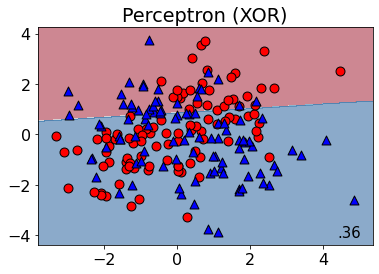

In [8]:
clf = Perceptron(max_iter=1000)

plot_result(clf, 'Perceptron', df, True)
plt.show()
plot_result(clf, 'Perceptron (XOR)', df_xor, True)

## 로지스틱 회귀

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


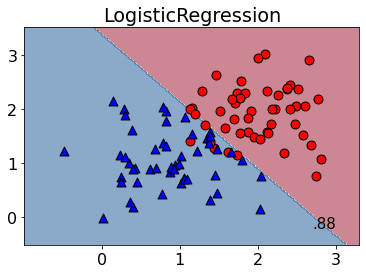

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


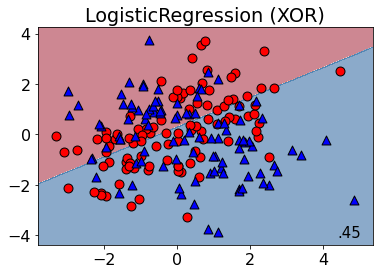

In [9]:
clf = LogisticRegression()
plot_result(clf, 'LogisticRegression', df, True)
plt.show()
plot_result(clf, 'LogisticRegression (XOR)', df_xor, True)

## k-NN 알고리즘

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


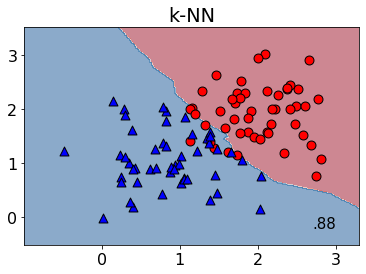

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


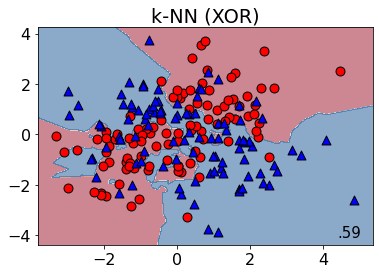

In [10]:
clf = KNeighborsClassifier(3)
plot_result(clf, 'k-NN', df, True)
plt.show()
plot_result(clf, 'k-NN (XOR)', df_xor, True)

## 결정 트리

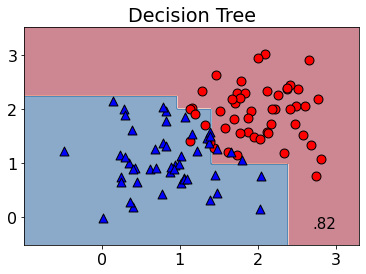

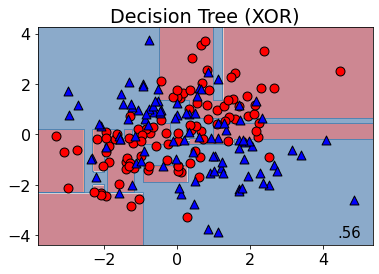

In [ ]:
clf = DecisionTreeClassifier()
plot_result(clf, 'Decision Tree', df, True)
plt.show()
plot_result(clf, 'Decision Tree (XOR)', df_xor, True)

## 랜덤 포레스트

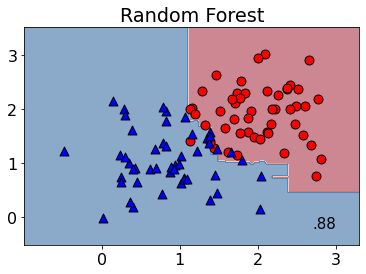

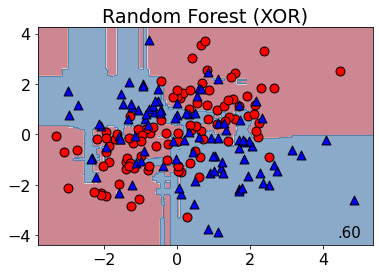

In [ ]:
clf = RandomForestClassifier()
plot_result(clf, 'Random Forest', df, True)
plt.show()
plot_result(clf, 'Random Forest (XOR)', df_xor, True)

## SVM(서포트 벡터 머신, 선형 커널)

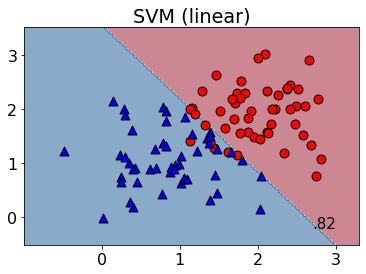

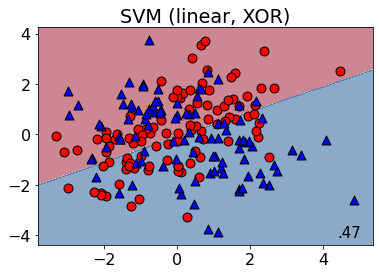

In [ ]:
clf = SVC(kernel='linear')
plot_result(clf, 'SVM (linear)', df, True)
plt.show()
plot_result(clf, 'SVM (linear, XOR)', df_xor, True)

## SVM(서포트 벡터 머신, RBF 커널)

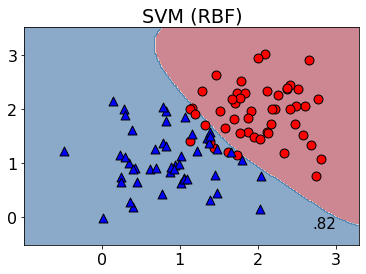

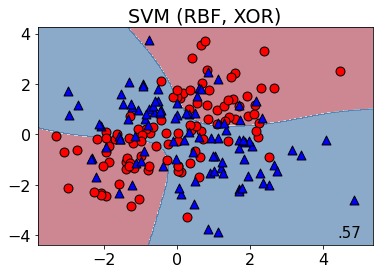

In [ ]:
clf = SVC(kernel='rbf')
plot_result(clf, 'SVM (RBF)', df, True)
plt.show()
plot_result(clf, 'SVM (RBF, XOR)', df_xor, True)

## 뉴럴 네트워크

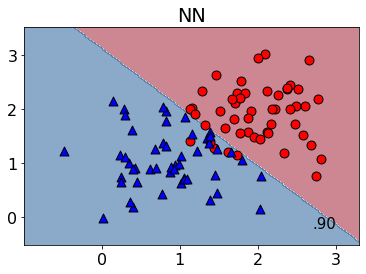

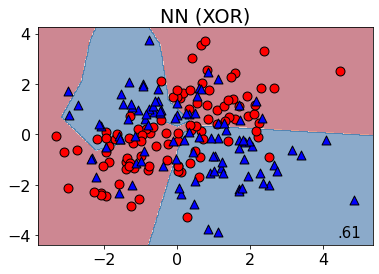

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=0.01,
                    hidden_layer_sizes=(5, 2), random_state=1)
plot_result(clf, 'NN', df, True)
plt.show()
plot_result(clf, 'NN (XOR)', df_xor, True)

## GBDT

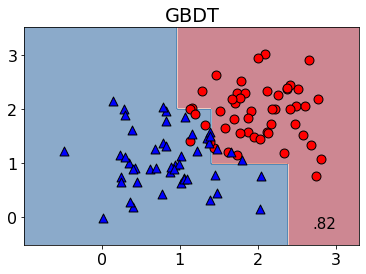

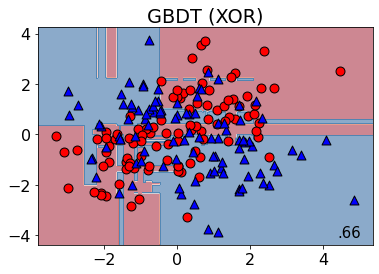

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
plot_result(clf, 'GBDT', df, True)
plt.show()
plot_result(clf, 'GBDT (XOR)', df_xor, True)